## Import Libraries

In [2]:
# Import needed libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Import and Clean Data

In [4]:
# Import the data set and give 'attrition flag' a more descriptive heading
ds = pd.read_csv('BankChurners.csv')
ds.rename(columns = {'Attrition_Flag':'Existing_Customer_Bit'}, inplace = True)

# Update string values to bit values 1 & 0
ds.loc[ds['Existing_Customer_Bit'] == 'Existing Customer', 'Existing_Customer_Bit'] = 1
ds.loc[ds['Existing_Customer_Bit'] == 'Attrited Customer', 'Existing_Customer_Bit'] = 0

ds[(ds['Existing_Customer_Bit'] == 0)].describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.627000e+03,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,7.352614e+08,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475,0.994909,0.005091
std,3.557725e+07,7.665652,1.275010,7.796548,1.577782,0.899623,1.090537,9095.334105,921.385582,9109.208129,0.214924,2308.227629,14.568429,0.226854,0.264458,0.004303,0.004303
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.945910,0.000420
25%,7.123713e+08,41.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2114.000000,0.000000,1587.000000,0.544500,1903.500000,37.000000,0.400000,0.000000,0.994300,0.002825
50%,7.165644e+08,47.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4178.000000,0.000000,3488.000000,0.701000,2329.000000,43.000000,0.531000,0.000000,0.996310,0.003688
75%,7.683737e+08,52.000000,3.000000,40.000000,5.000000,3.000000,4.000000,9933.500000,1303.500000,9257.500000,0.856000,2772.000000,51.000000,0.692000,0.231000,0.997170,0.005700
max,8.282949e+08,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,94.000000,2.500000,0.999000,0.999580,0.054090


In [3]:
# Drop unused/unnecessary columns and split data into Features and Labels
ds.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'CLIENTNUM',
         'Total_Relationship_Count',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
        inplace=True, 
        axis=1)

X = ds.drop('Existing_Customer_Bit', axis=1)
y = ds['Existing_Customer_Bit']

## Data Visualization / Descriptive Method

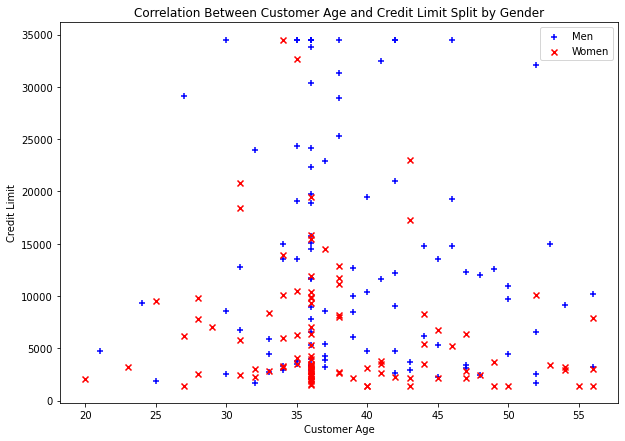

In [4]:
# Visualization #1 - Visualizing the correlation between customer age and credit limit split by gender

# mean cus age == 46
men = ds[(ds.Gender == 'M')]
women = ds[(ds.Gender == 'F')]
# x = months on book
# y = credit limit

matplotlib.rcParams['figure.figsize'] = (10,7)

men_x = men.Months_on_book[:100]
men_y = men.Credit_Limit[:100]

women_x = women.Months_on_book[:100]
women_y = women.Credit_Limit[:100]

plt.scatter(men_x, men_y, marker = '+', color = 'blue', label = 'Men')
plt.scatter(women_x, women_y, marker = 'x', color = 'red', label = 'Women')
plt.xlabel("Customer Age")
plt.ylabel("Credit Limit")
plt.title("Correlation Between Customer Age and Credit Limit Split by Gender")
plt.legend();

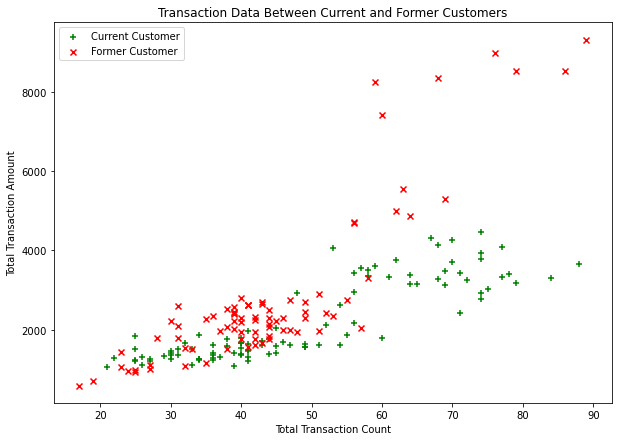

In [5]:
# Visualization #2 - Visualizing transaction data differences between current and former customers

# mean cus age == 46
existing_customer = ds[(ds.Existing_Customer_Bit == 1) & (ds.Customer_Age == 46)]
former_customer = ds[(ds.Existing_Customer_Bit == 0) & (ds.Customer_Age == 46)]

matplotlib.rcParams['figure.figsize'] = (10,7)

existing_customer_x = existing_customer.Total_Trans_Ct[:100]
existing_customer_y = existing_customer.Total_Trans_Amt[:100]

former_customer_x = former_customer.Total_Trans_Ct[:100]
former_customer_y = former_customer.Total_Trans_Amt[:100]

plt.scatter(existing_customer_x, existing_customer_y, marker = '+', color = 'green', label = 'Current Customer')
plt.scatter(former_customer_x, former_customer_y, marker = 'x', color = 'red', label = 'Former Customer')
plt.xlabel("Total Transaction Count")
plt.ylabel("Total Transaction Amount")
plt.title("Transaction Data Between Current and Former Customers")
plt.legend();

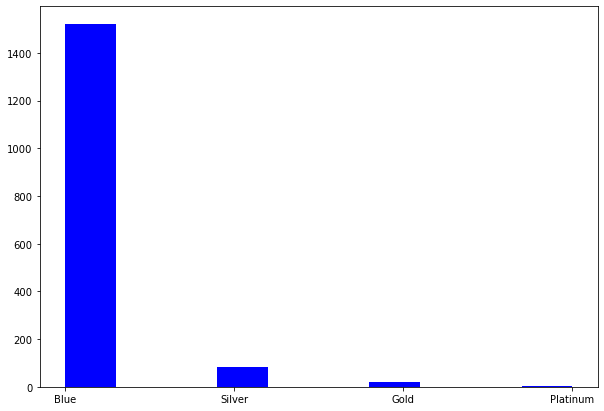

In [6]:
# Visualization #3 - Visualizing the card types held by all former customers

former_customers = ds[(ds.Existing_Customer_Bit == 0)]

# Historgram plot (Only one axis)
plt.hist(former_customers['Card_Category'], color = 'blue');

## Machine Learning / Non-Descriptive Method

In [7]:
# Create a list of all categorical columns
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Instantiate OneHotEncoder into a variable
one_hot = OneHotEncoder()

# Encode category columns for proper ML ingestion
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)],
                               remainder = 'passthrough')

# Assign the encoded data to transformed_X and view the data in a pandas data frame
transformed_X = transformer.fit_transform(X)
pd.DataFrame(transformed_X[:5])

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,3.0,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,8256.0,864.0,7392.0,1.541,1291.0,33.0,3.714,0.105
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.000
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,1.0,3313.0,2517.0,796.0,1.405,1171.0,20.0,2.333,0.760
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,4716.0,0.0,4716.0,2.175,816.0,28.0,2.500,0.000


In [8]:
# Split the data into training and test sets and show the shape of each result
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8101, 36), (2026, 36), (8101,), (2026,))

In [9]:
# Check for missing data, which if found will need to be cleaned for ML ingestion
ds.isna().sum()

Existing_Customer_Bit     0
Customer_Age              0
Gender                    0
Dependent_count           0
Education_Level           0
Marital_Status            0
Income_Category           0
Card_Category             0
Months_on_book            0
Months_Inactive_12_mon    0
Contacts_Count_12_mon     0
Credit_Limit              0
Total_Revolving_Bal       0
Avg_Open_To_Buy           0
Total_Amt_Chng_Q4_Q1      0
Total_Trans_Amt           0
Total_Trans_Ct            0
Total_Ct_Chng_Q4_Q1       0
Avg_Utilization_Ratio     0
dtype: int64

In [10]:
# Instantiate clf as a Random Forest Classifier, train the model, and then test the model's
# accuracy
clf = RandomForestClassifier()

clf.fit(X_train, y_train.astype(int))
clf.score(X_test, y_test.astype(int))

0.9427443237907206

In [11]:
# Looking at the probability split of the test data on a limited number of results
clf.predict_proba(X_test[:5])

array([[0.18, 0.82],
       [0.35, 0.65],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.  , 1.  ]])

In [12]:
# Accuracy score is > 90%, so the model is ready to be tested
# A value of 1 == existing customer, so a customer who is not at risk to cancel their card
# A value of 0 == attritted customer, so the custoemr is at risk of cancelling their card

In [13]:
# Test 1 - Indicates a customer not at risk to cancel their card
clf.predict([ [0,1,               # Gender == M
               1,0,0,0,0,0,0,     # Education Level == College
               0,1,0,0,           # Marital Status == Married
               1,0,0,0,0,0,       # Income Category == > $120k
               0,1,0,0,           # Card Category == Gold
               33,2,12,0,25,17000,1000,16000,1.1,2300,23,1.1,0.05] ])

array([1])

In [14]:
# Test 2 - Indicates a customer not at risk to cancel their card
clf.predict([ [1,0,               # Gender == F
               0,0,0,0,0,1,0,     # Education Level == Uneducated
               0,0,1,0,           # Marital Status == Single
               0,0,0,0,0,1,       # Income Category == Unknown
               1,0,0,0,           # Card Category == Blue
               47,0,3,1,4,5000,2000,3000,1,2000,6,1,0.4] ])

array([1])

In [15]:
# Test 3 - Indicates a customer at risk to cancel their card
clf.predict([ [0,1,               # Gender == M
               0,0,1,0,0,0,0,     # Education Level == Graduate
               0,1,0,0,           # Marital Status == Married
               0,0,0,0,1,0,       # Income Category == < $40k
               1,0,0,0,           # Card Category == Blue
               47,2,36,3,3,8000,675,7460,0.69,700,45,0.75,0.56] ])

array([0])